### Supervised Learning Analysis: 500 vs 1000 training reads


#### 500 vs 1000 training reads 
* This notebook compares testing accuracy across the 30 rounds of training with one sample of 1000 reads in training and one with 500 reads in training. 


In [1]:
import os
import numpy as np
import pandas as pd
from py3helpers.aws import AwsS3
from rrna_analysis.plot_experiment_table import plot_acc_heatmap_for_experiment
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping

mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)
client = AwsS3()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


Enter MFA code for arn:aws:iam::652235167018:mfa/andbaile@ucsc.edu: ········


In [2]:
model_n = 30
key="accuracy"
# key="recall"
# key="specificity"
# key="precision"
# key="negative_predictive_value"
# key="brier_score"
# key="f1_score"

max_percent=100
min_percent=0
min_delta=0
max_delta=np.inf

_reads_1000 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_1000_test_500_prob_0.5_em_iterations_30/"
_reads_500 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/"

top_dirs = [_reads_500, _reads_1000]
round_n = 30

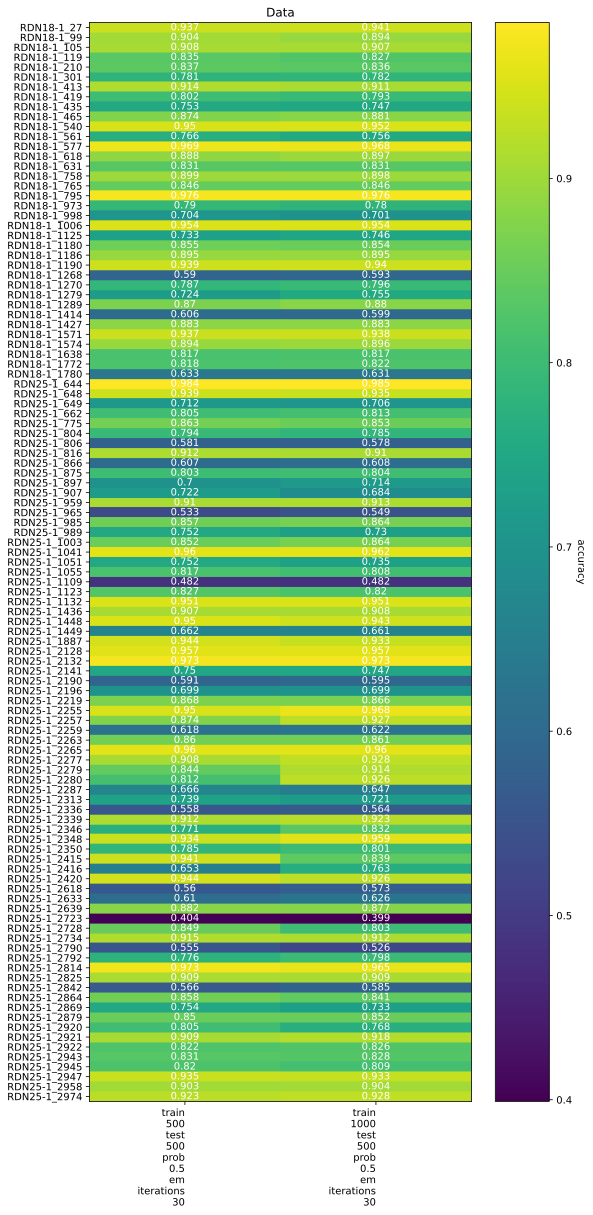

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
plot_acc_heatmap_for_experiment(top_dirs, key, kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client)

In [1]:
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv, sort_dir   
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from py3helpers.utils import list_dir
from signalalign.hiddenMarkovModel import HmmModel


mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
from py3helpers.utils import list_dir
reads_1000 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_1000_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
reads_500 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
reads_1000_csvs = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(reads_1000, "csv")]
reads_500_csvs = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(reads_500, "csv")]



<IPython.core.display.Javascript object>


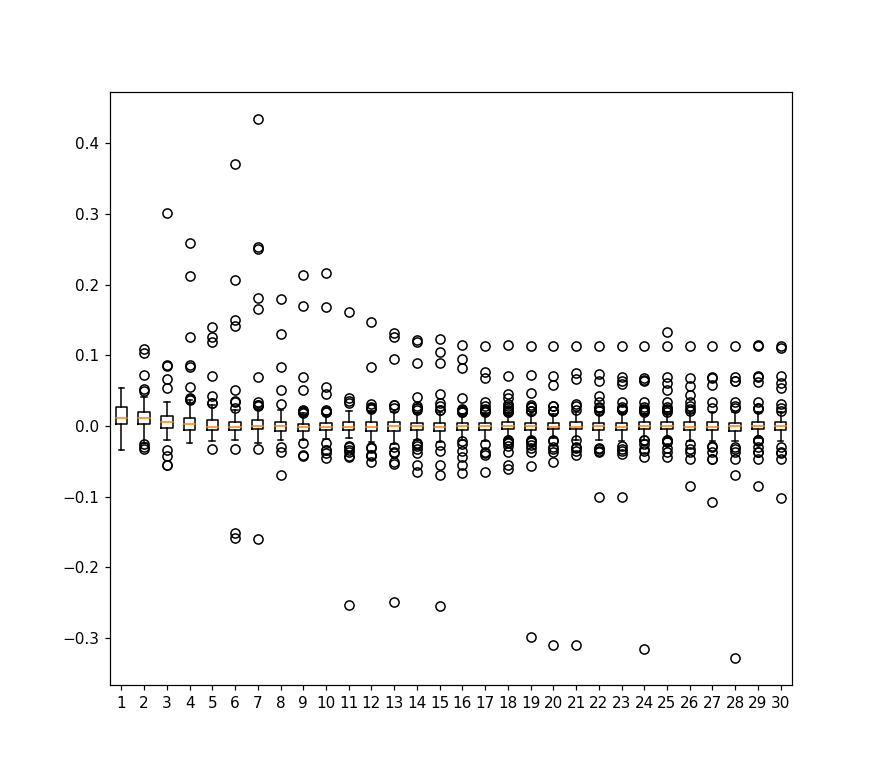

In [3]:
%matplotlib notebook
# 1000 - 500
deltas = [reads_1000_csvs[i].accuracy - reads_500_csvs[i].accuracy  for i in range(len(reads_500_csvs))]
fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(deltas) 
  
# show plot 
plt.show() 


In [4]:
i = 1
testing_diff = 0.05
reads_1000_csvs[i]["testing_diff"] =  reads_1000_csvs[i].accuracy - reads_500_csvs[i].accuracy 
reads_1000_csvs[i][np.abs(reads_1000_csvs[i]["testing_diff"]) > testing_diff][["contig", "reference_index", "accuracy", "recall", "delta", "percent", "testing_diff"]]       

,contig,reference_index,accuracy,recall,delta,percent,testing_diff
8,RDN18-1,435,0.6684,0.9347,16.0,73,0.0522
60,RDN25-1,1436,0.8314,0.9044,12.0,95,0.1033
66,RDN25-1,2141,0.7912,0.6310,9.0,95,0.1092
104,RDN25-1,2922,0.7714,0.9915,1.0,95,0.0715


In [5]:
i = 29
testing_diff = 0.05
reads_1000_csvs[i]["testing_diff"] =  reads_1000_csvs[i].accuracy - reads_500_csvs[i].accuracy 
reads_1000_csvs[i][np.abs(reads_1000_csvs[i]["testing_diff"]) > testing_diff][["contig", "reference_index", "accuracy", "recall", "delta", "percent", "testing_diff"]]       

,contig,reference_index,accuracy,recall,delta,percent,testing_diff
71,RDN25-1,2257,0.9271,0.9769,2.0,95,0.0536
76,RDN25-1,2279,0.9142,0.9789,1.0,100,0.0707
77,RDN25-1,2280,0.9260,0.9832,1.0,100,0.1138
82,RDN25-1,2346,0.8324,0.8487,2.0,77,0.0612
85,RDN25-1,2415,0.8387,0.7032,1.0,95,-0.1022
86,RDN25-1,2416,0.7634,0.9116,1.0,100,0.1107


In [6]:
acc_csv_500 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
acc_csv_1000 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_1000_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"


In [7]:
acc_csv_500_data = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(acc_csv_500, "csv")]
acc_csv_1000_data = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(acc_csv_1000, "csv")]


In [39]:
round_30_500 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/training_models/template_hmm30.model"
round_30_1000 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/probability_sweep/train_1000_test_500_prob_0.5_em_iterations_30/training_models/template_hmm30.model"
m30_500 = HmmModel(round_30_500, rna=True)
m30_1000 = HmmModel(round_30_1000, rna=True)

t = np.array(m30_500.event_model["SDs"]) - np.array(m30_1000.event_model["SDs"])
df = pd.DataFrame(data=t, index=m30_500.sorted_kmer_tuple, columns=["sd_diff"])


In [40]:
df.describe()

,sd_diff
count,1.419857e+06
mean,4.986012e-07
std,1.232066e-02
min,-5.814660e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,6.302870e+00


In [9]:
df2 = df[(df.T != 0).any()]
df2.describe()

,sd_diff
count,469.000000
mean,0.001509
std,0.678629
min,-5.814660
25%,-0.069906
50%,0.002224
75%,0.070720
max,6.302870


<IPython.core.display.Javascript object>


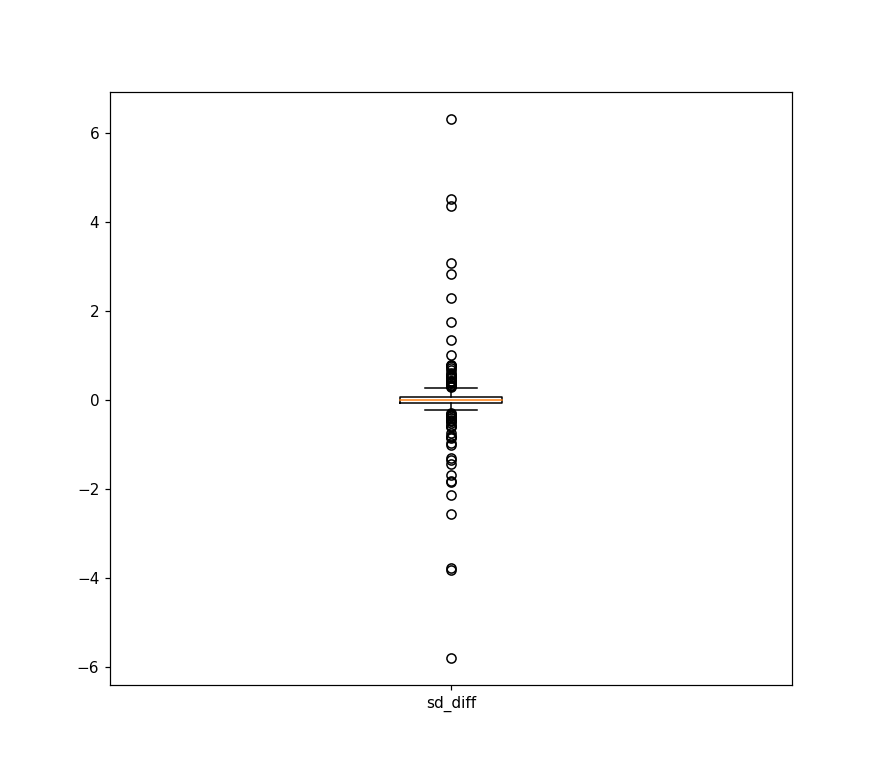

In [10]:
%matplotlib notebook

fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(df2.T) 
plt.xticks(range(1, len(df2.columns)+1), df2.columns)

# show plot 
plt.show() 


In [ ]:
df

In [17]:
reads_500_csvs[-1]["minus_1000"] = reads_500_csvs[-1].accuracy - reads_1000_csvs[-1].accuracy

In [18]:
round_30 = reads_500_csvs[-1]

In [41]:
df.loc["TATAC"]


sd_diff    0.0
Name: TATAC, dtype: float64

In [49]:
max_sd = False
x = []
y = []
labels = []
for i, data in round_30.iterrows():
    label = "_".join([data.contig, data.strand, str(data.reference_index)])
    covered_kmers = kpm.get_kmers_covering_mod(data.contig, data.strand, data.reference_index)
    kmers = set().union(*covered_kmers)
    sd_deltas = [df.loc[k] for k in kmers]
    labels.append(label)
    x.append(data.minus_1000)
    if max_sd: 
        y.append(np.max(sd_deltas))
    else:
        y.append(np.sum(sd_deltas))

In [55]:
quad1 = 0
quad2 = 0
quad3 = 0
quad4 = 0
for i,j in zip(x, y):
    if i > 0 and j > 0:
        quad1 += 1
    if i < 0 and j > 0:
        quad2 += 1
    if i < 0 and j < 0:
        quad3 += 1
    if i > 0 and j < 0:
        quad4 += 1
    if i == 0 or j == 0:
        print(i, j)

0.0 -0.04918905123160777
0.0 0.8795537661439247
0.0 0.0053003274914975584
0.0 -0.1508325645392421
0.0 -0.20724157408783417
0.0 -0.3588638669892902
0.0 0.13900403350210833
0.0 0.09925983946377803
0.0 0.1704381689220842
0.0 0.28669908291104207
0.0 0.5152212630651298
0.0 0.40769171099720714
0.0 0.20195726603392383


In [58]:
print(quad2, quad1)
print(quad3, quad4)

27 28
22 20


<IPython.core.display.Javascript object>


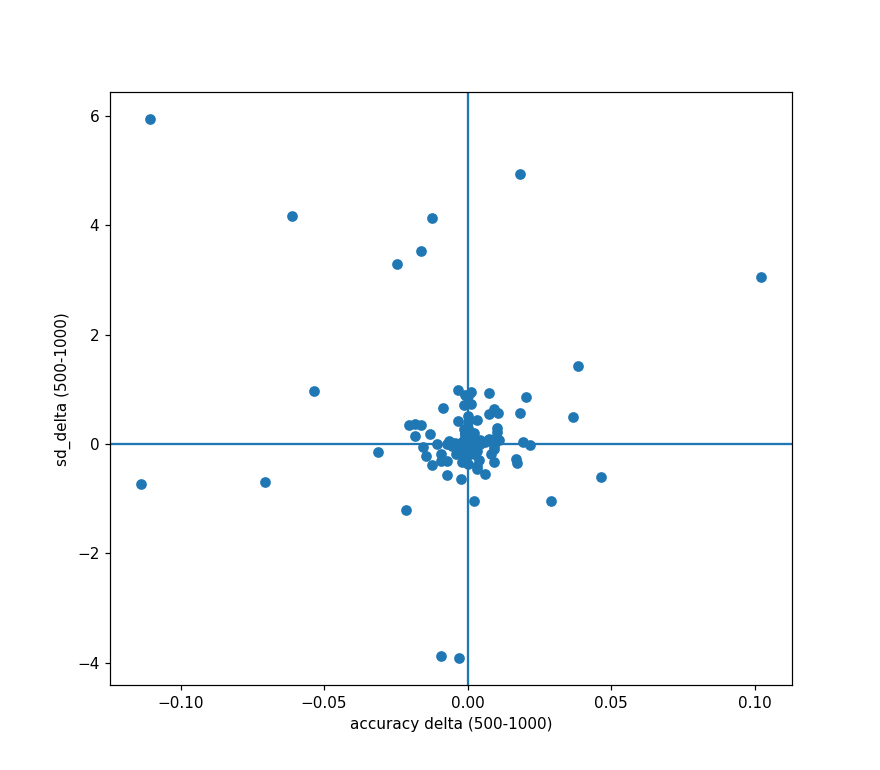

In [54]:
%matplotlib notebook

fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.scatter(x, y)
# fig.suptitle('test title')
plt.xlabel('accuracy delta (500-1000)')
plt.ylabel('sd_delta (500-1000)')
plt.axhline(0)
plt.axvline(0)

# for i, txt in enumerate(labels):
#     ax.annotate(txt, (x[i], y[i]))

# plt.xticks(range(1, len(df2.columns)+1), df2.columns)

# show plot 
plt.show() 


In [21]:
round_30

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent,minus_1000
0,RDN18-1,27,+,Aa,0.9368,0.9931,0.8917,0.8801,0.9939,143.4533,0.0070,20578.8355,0.9332,0.5015,0.9689,0.9689,0.0542,72.0,NaN,72.0,False,False,False,95,-0.0041
1,RDN18-1,99,+,Aa,0.9042,0.9975,0.8399,0.8110,0.9980,396.5671,0.0025,157265.4435,0.8946,0.5015,0.9405,0.9426,0.0901,6.0,72.0,6.0,False,False,False,80,0.0102
2,RDN18-1,105,+,Tl,0.9083,0.9258,0.8919,0.8882,0.9284,12.4096,0.0806,153.9977,0.9066,0.5015,0.9560,0.9513,0.0769,14.0,6.0,6.0,False,False,False,95,0.0011
3,RDN18-1,119,+,Tl,0.8349,0.8571,0.8150,0.8049,0.8650,5.9634,0.1677,35.5623,0.8302,0.5015,0.9106,0.9193,0.1295,91.0,14.0,14.0,False,False,False,95,0.0082
4,RDN18-1,210,+,Tl,0.8369,0.8825,0.8007,0.7785,0.8957,7.4640,0.1340,55.7115,0.8272,0.5015,0.8865,0.8989,0.1414,91.0,91.0,91.0,False,False,False,83,0.0010
5,RDN18-1,301,+,Tl,0.7806,0.8017,0.7620,0.7480,0.8135,4.0111,0.2493,16.0887,0.7739,0.5020,0.8480,0.8650,0.1774,112.0,91.0,91.0,False,False,False,86,-0.0010
6,RDN18-1,413,+,Cb,0.9140,0.9452,0.8868,0.8796,0.9487,17.1344,0.0584,293.5893,0.9112,0.5015,0.9549,0.9581,0.0762,6.0,112.0,6.0,False,False,False,95,0.0030
7,RDN18-1,419,+,Aa,0.8025,0.8877,0.7475,0.6939,0.9117,7.8586,0.1272,61.7571,0.7789,0.5015,0.8596,0.8768,0.1605,16.0,6.0,6.0,False,False,False,95,0.0093
8,RDN18-1,435,+,Aa,0.7533,0.7173,0.8045,0.8388,0.6674,2.5215,0.3966,6.3580,0.7733,0.5015,0.8399,0.8193,0.2016,30.0,16.0,16.0,False,False,False,73,0.0061
9,RDN18-1,465,+,Tl,0.8741,0.9742,0.8085,0.7694,0.9795,37.4692,0.0267,1403.9397,0.8597,0.5015,0.9565,0.9582,0.0975,75.0,30.0,30.0,False,False,False,60,-0.0072


In [11]:
key="accuracy"
high_percent=100
low_percent=0
low_delta=0
high_delta=np.inf
max_delta=False
aot=True
avd=True
model_n = 30


<IPython.core.display.Javascript object>


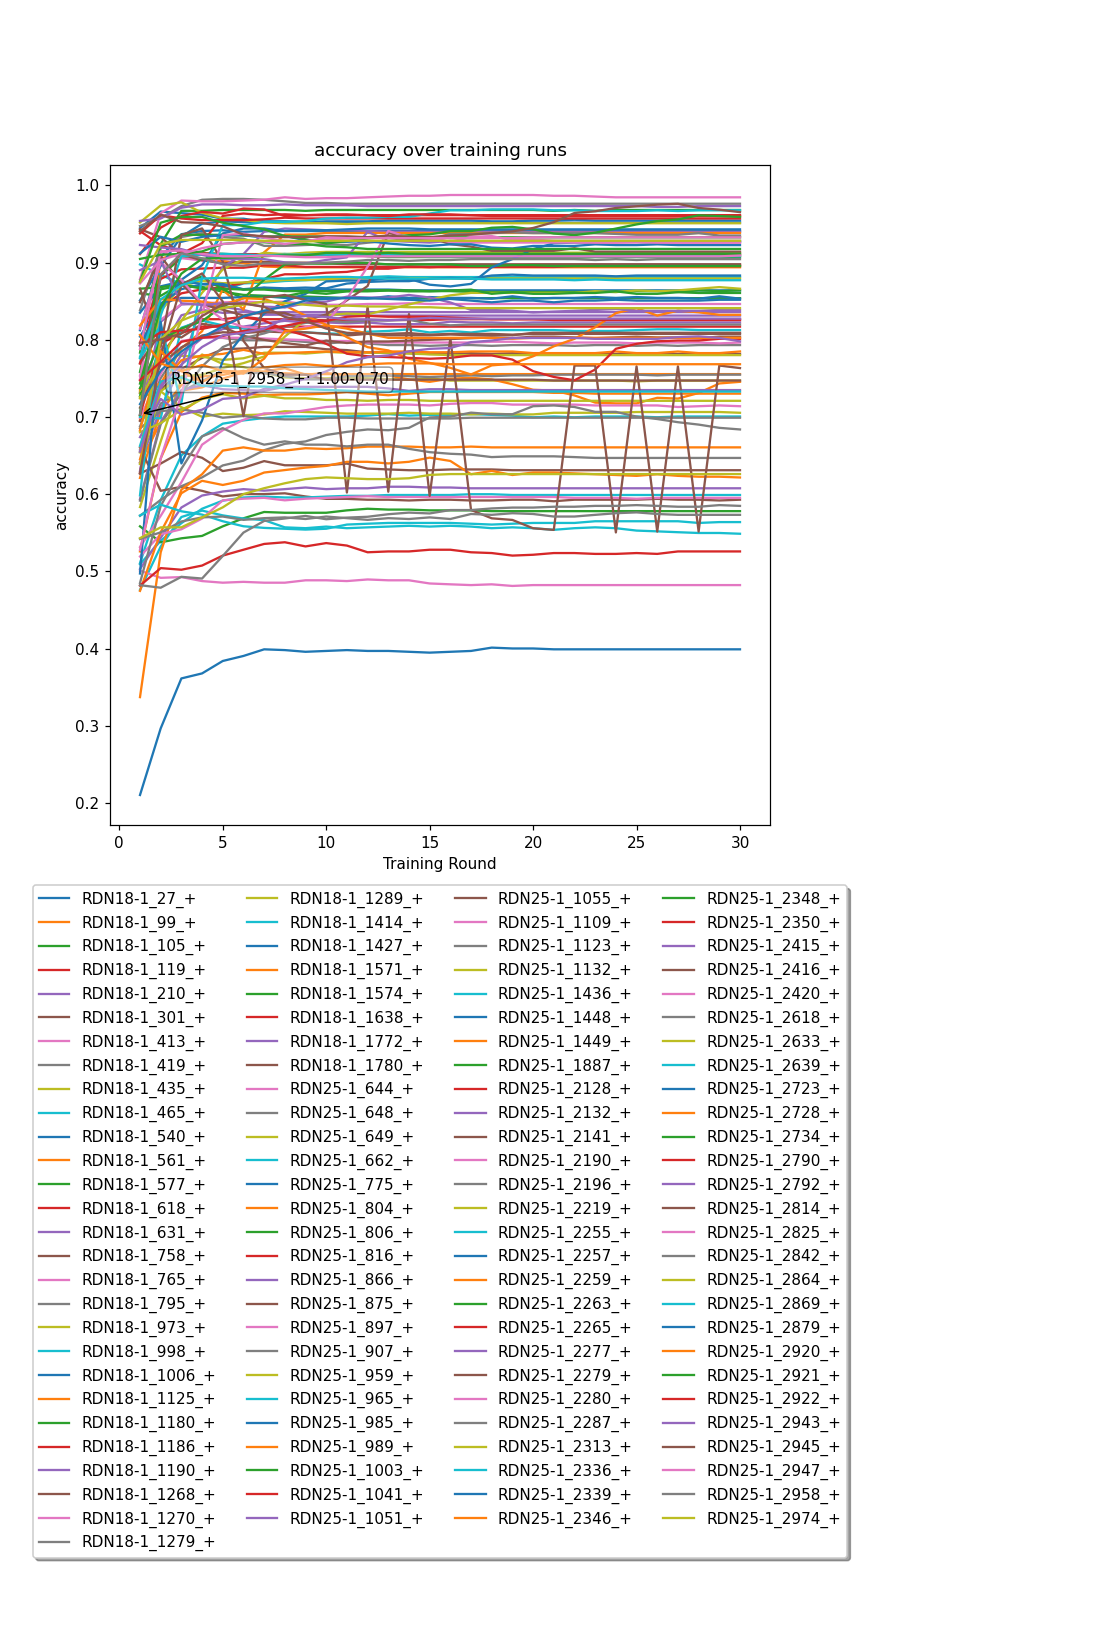

<IPython.core.display.Javascript object>


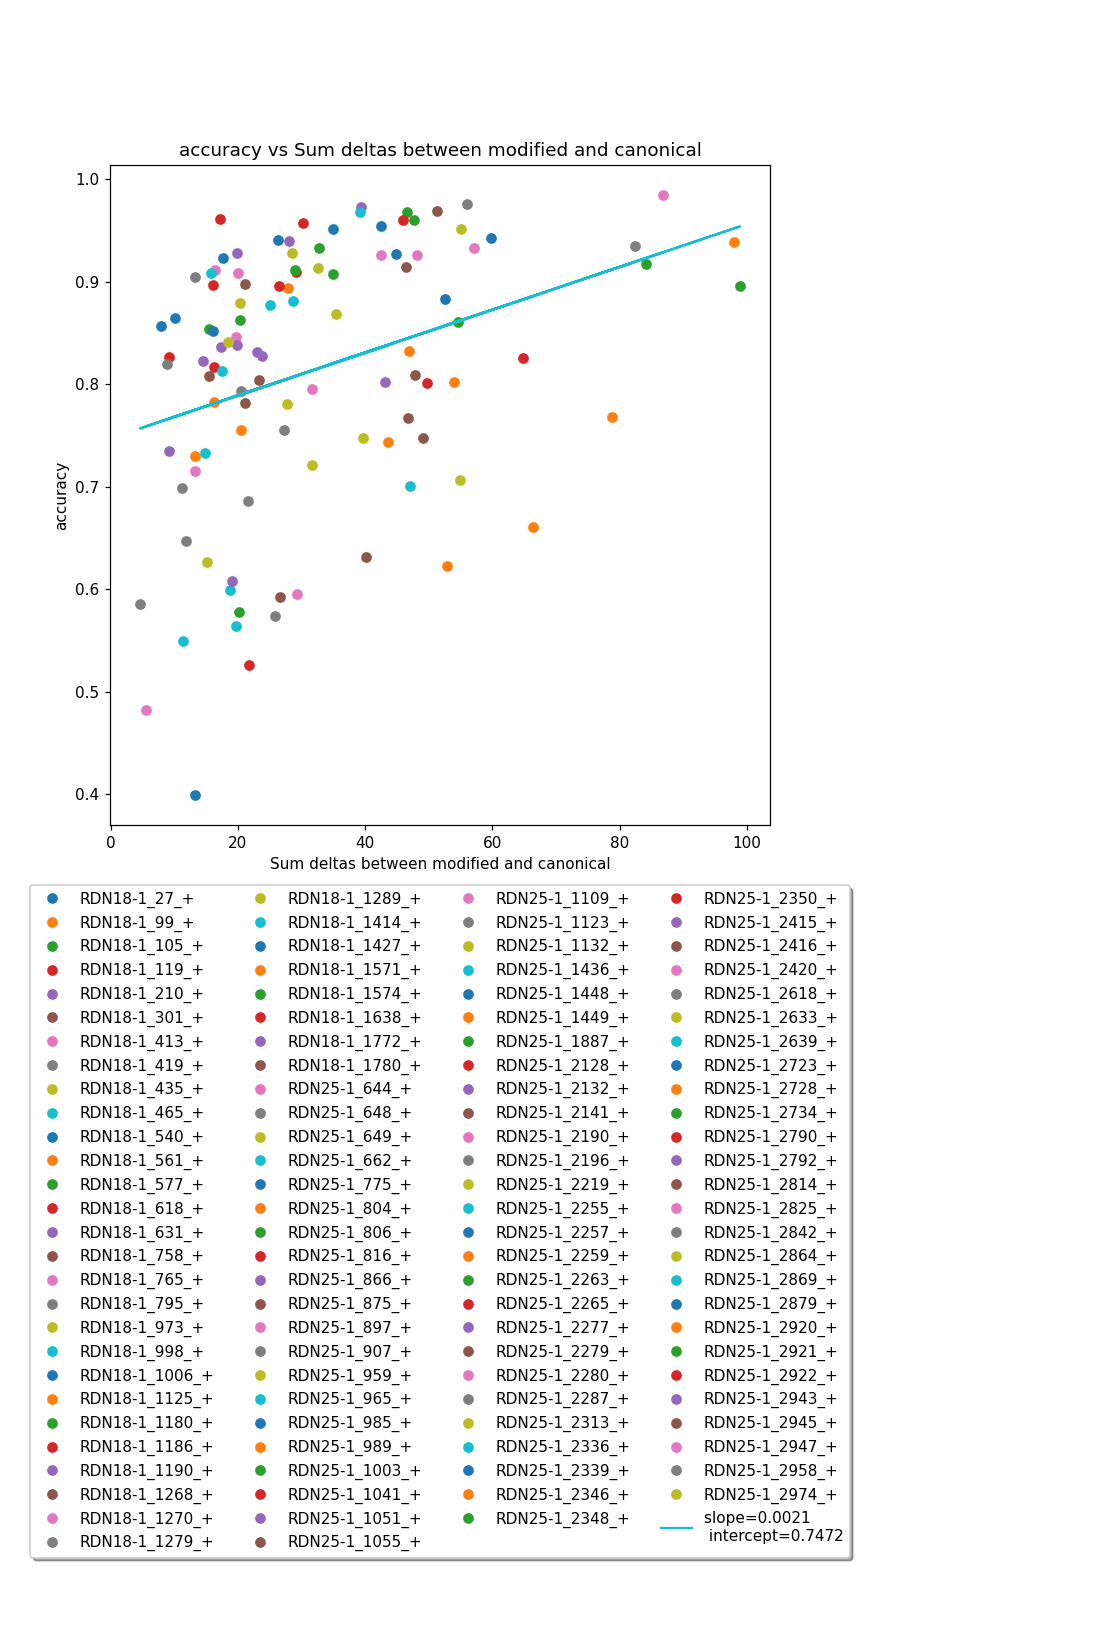

In [12]:
%matplotlib notebook
experiment_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_1000_test_500_prob_0.5_em_iterations_30/"

dir_path = os.path.join(experiment_path, "testing_accuracy_csvs")
model_dir = os.path.join(experiment_path, "training_models")
p, k = plot_accuracy_vs_delta_and_accuracy_over_time(kpm,
                                                     dir_path, 
                                                     model_dir, 
                                                         model_n, 
                                                         high_percent=high_percent, 
                                                         low_percent=low_percent, 
                                                         low_delta=low_delta, 
                                                         high_delta=high_delta, 
                                                         key=key, 
                                                         max_delta=max_delta,
                                                         aot=aot,
                                                         avd=avd)  


<IPython.core.display.Javascript object>


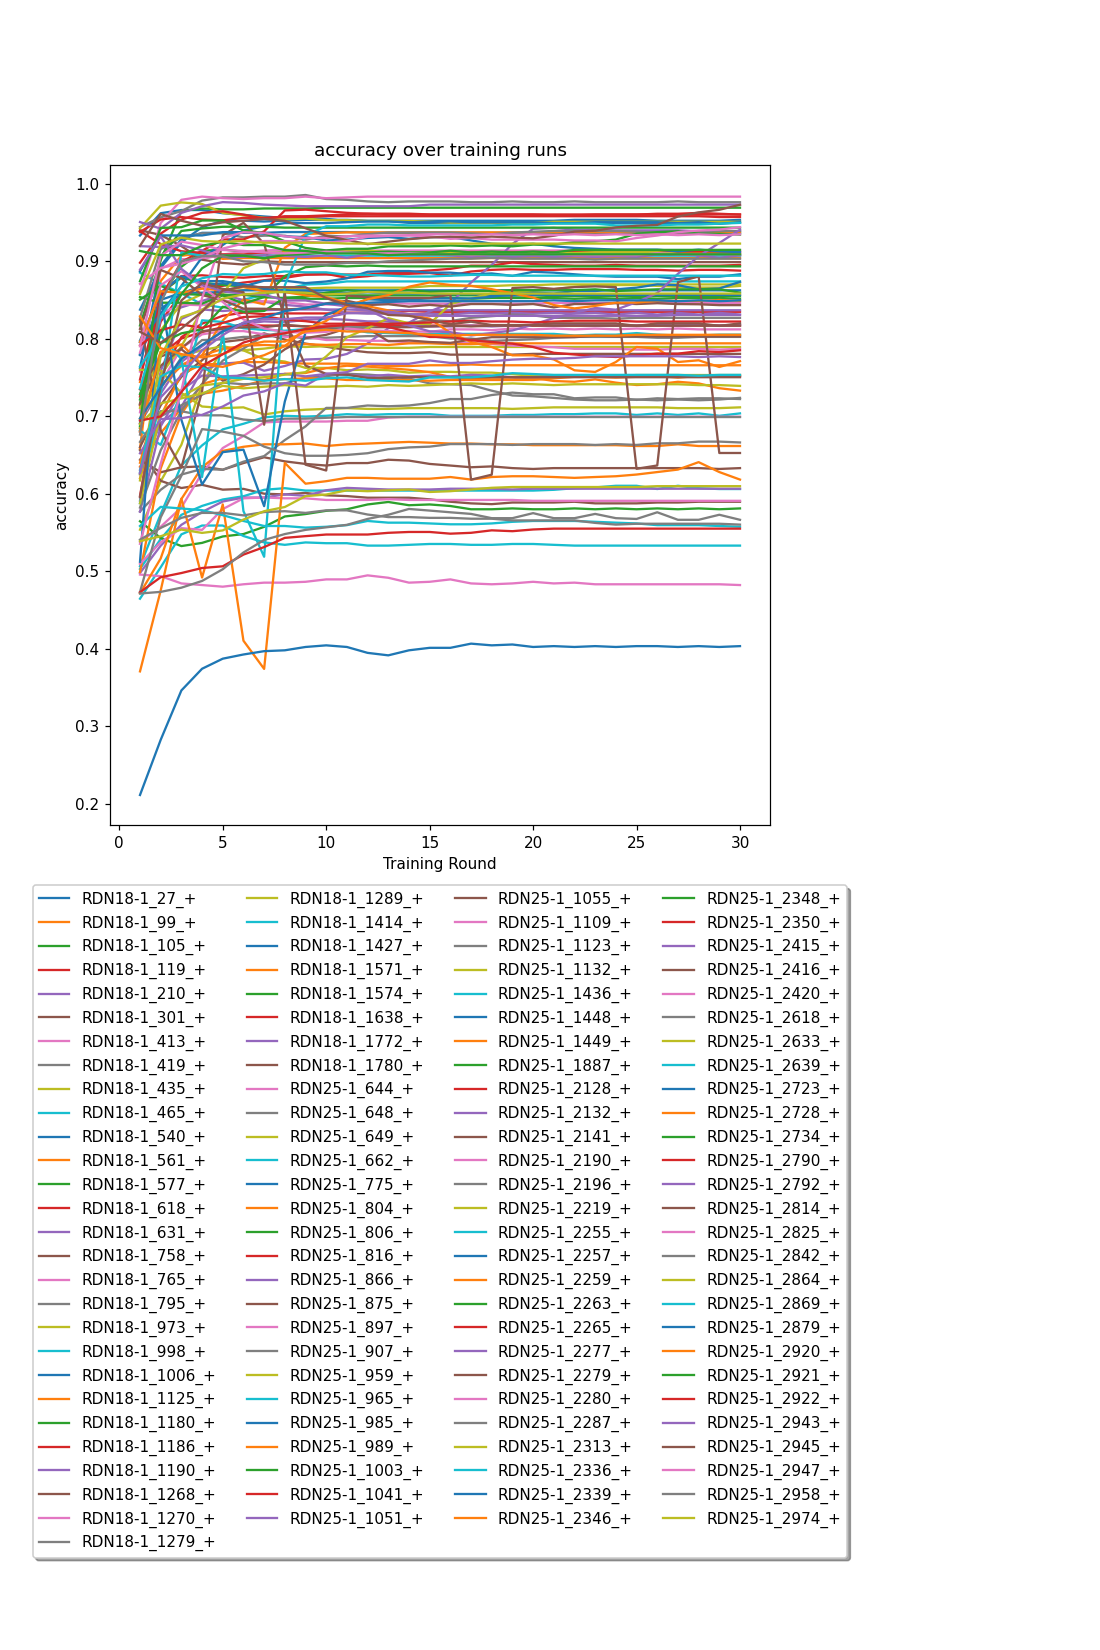

<IPython.core.display.Javascript object>


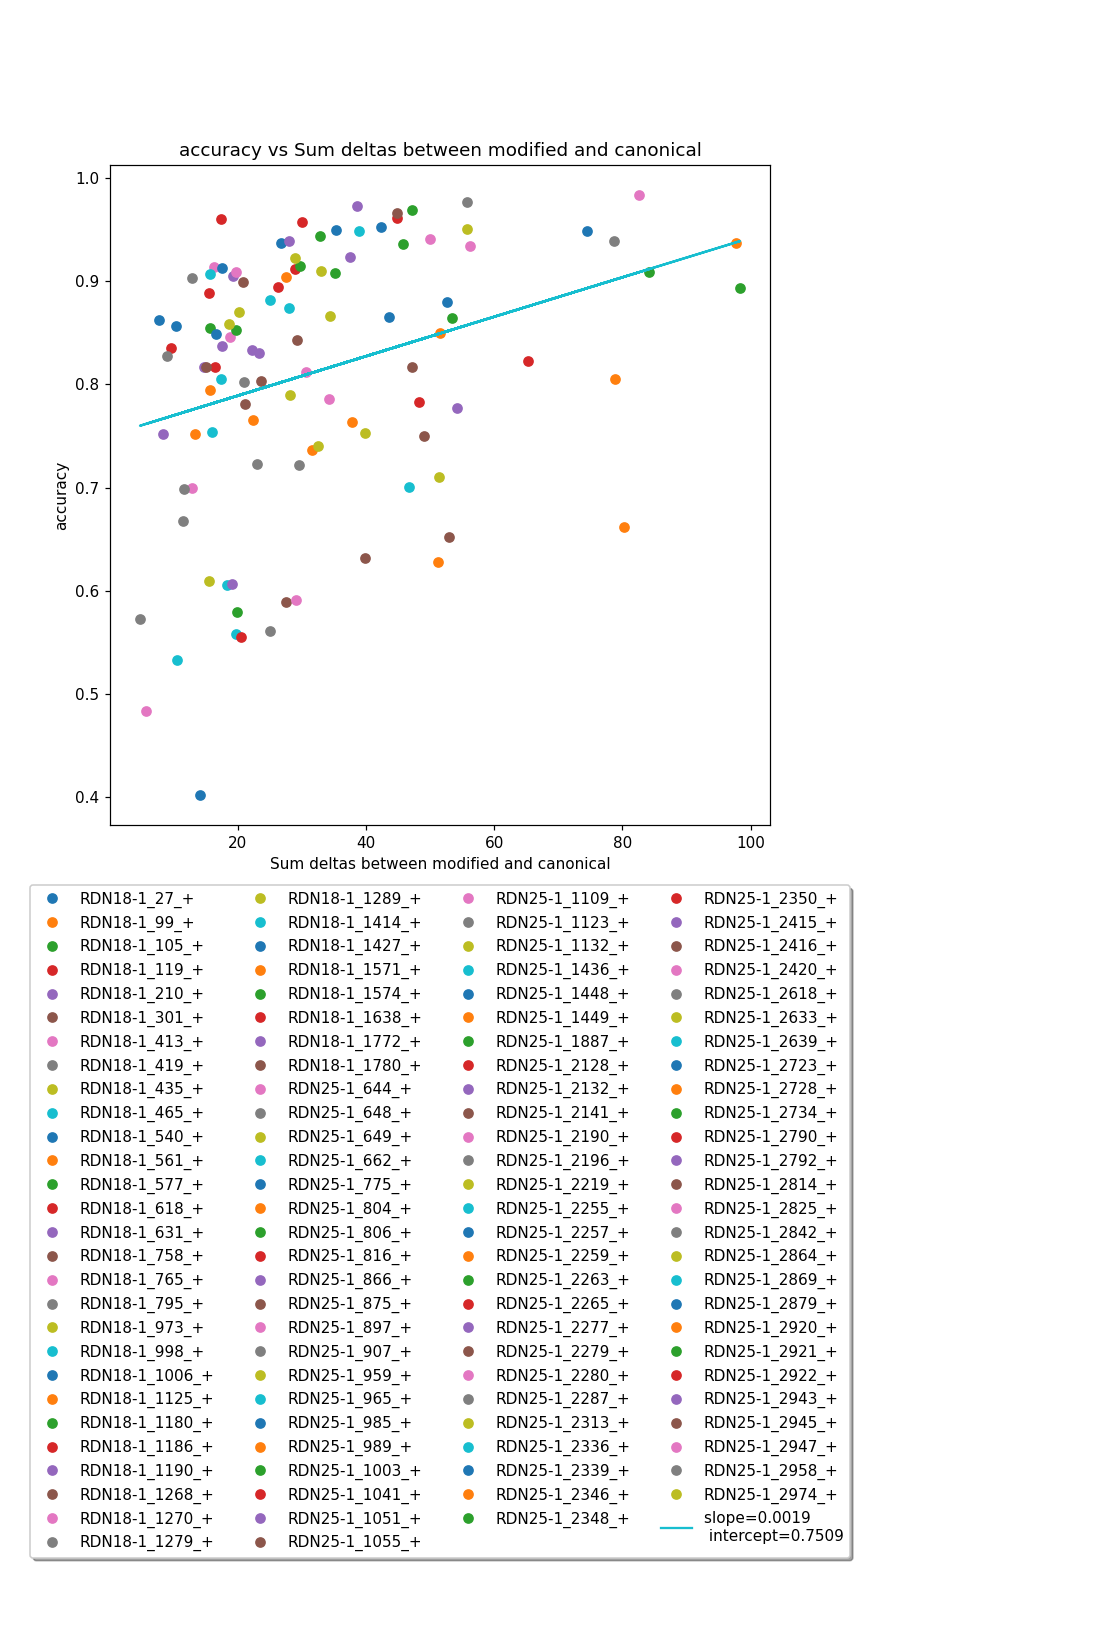

In [14]:
experiment_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/"

dir_path = os.path.join(experiment_path, "testing_accuracy_csvs")
model_dir = os.path.join(experiment_path, "training_models")
p, k = plot_accuracy_vs_delta_and_accuracy_over_time(kpm, dir_path, 
                                                         model_dir, 
                                                         model_n, 
                                                         high_percent=high_percent, 
                                                         low_percent=low_percent, 
                                                         low_delta=low_delta, 
                                                         high_delta=high_delta, 
                                                         key=key, 
                                                         max_delta=max_delta,
                                                         aot=aot,
                                                         avd=avd)  
